# Trying Color Histogram

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
DATADIR = "E:/humandataset"
path  = os.path.join(DATADIR,'human')

sample_array = cv2.imread(os.path.join(path,'person_027.bmp'))
sample_array = cv2.cvtColor(sample_array, cv2.COLOR_BGR2RGB)

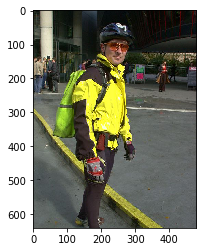

In [3]:
%matplotlib inline
plt.imshow(sample_array)

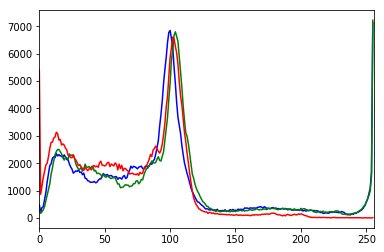

In [4]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([sample_array],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Using K-Means color clustering

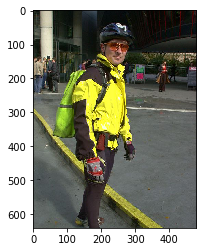

In [5]:
%matplotlib inline

DATADIR = "E:/humandataset"
path  = os.path.join(DATADIR,'human')

sample_array = cv2.imread(os.path.join(path,'person_027.bmp'))
sample_array = cv2.cvtColor(sample_array, cv2.COLOR_BGR2RGB)

plt.imshow(sample_array)

In [6]:
sample_array = sample_array.reshape((sample_array.shape[0] * sample_array.shape[1], 3))
sample_array.shape

(307200, 3)

In [7]:
from sklearn.cluster import KMeans

clt = KMeans(n_clusters = 3)
clt.fit(sample_array)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
def centroid_histogram(clt):
	
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	
	hist = hist.astype("float")
	hist /= hist.sum()
 
	return hist

In [9]:
hist = centroid_histogram(clt)

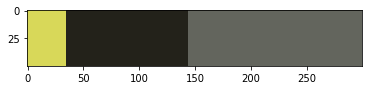

In [10]:
def plot_colors(hist, centroids):
	
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	
	for (percent, color) in zip(hist, centroids):
		
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar
bar = plot_colors(hist,clt.cluster_centers_)
plt.imshow(bar)

### converting rgb to hex

In [28]:
'#{:02x}{:02x}{:02x}'.format( bar[0][0][0] ,bar[0][0][1]  ,bar[0][0][2] )

'#d8d859'